In [6]:
!pip install cylp pandas tqdm matplotlib

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import copy
from cylp.cy import CyClpSimplex
from cylp.py.modeling.CyLPModel import CyLPModel, CyLPArray
from tqdm import tqdm

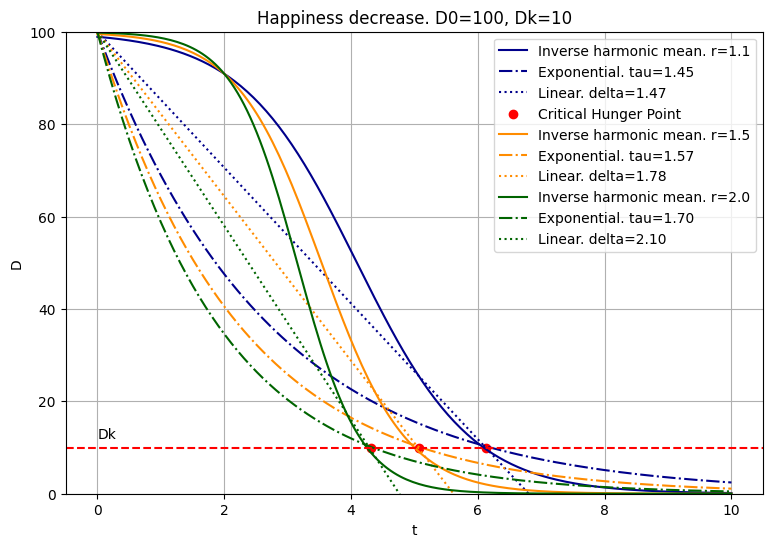

In [8]:
"""Нет большой разницы, потреблять благо линейно, экспоненциально или по
обратному среднему гармоническому. Всё дело в постоянных времени - от них
зависит, когда клиент достигнет критическогот голода."""
t = np.linspace(-2, 8, 200)
te = t + 2
D0, Dk = 100, 10
plt.figure(figsize=(9, 6))
for r, tau, dt, c in zip(
    [1.1, 1.5, 2.0],
    [1.45, 1.57, 1.7],
    [1.47, 1.78, 2.1],
    ["darkblue", "darkorange", "darkgreen"],
):
    d = D0 * Dk * np.exp(r * t) / (D0 + Dk * np.exp(r * t))
    s = D0 / (tau ** (te))
    l = D0 - dt * te * 10
    plt.plot(te, D0 - d, label="Inverse harmonic mean. r=%.1f" % r, c=c)
    plt.plot(te, s, label="Exponential. tau=%.2f" % tau, c=c, ls="-.")
    plt.plot(te, l, label="Linear. delta=%.2f" % dt, c=c, ls=":")
    i = np.where(l <= Dk)[0][0]
    plt.scatter(
        te[i], Dk, c="r", label="Critical Hunger Point" if c == "darkblue" else None
    )
plt.axhline(Dk, c="r", ls="--")
plt.xlabel("t")
plt.ylabel("D")
plt.text(0, Dk + 2, "Dk")
plt.title("Happiness decrease. D0=%i, Dk=%i" % (D0, Dk))
plt.ylim(0, D0)
plt.legend()
plt.grid()
plt.show()

In [9]:
"""скользящее среднее"""


def MovingAverage(x, numb=10):
    n = len(x) // numb
    ma = list(x[:n])
    for j in range(len(x) - n):
        ma.append(np.mean(x[j : j + n]))
    return np.array(ma)

In [10]:
"""For pure fantasy"""
n = 182
date = pd.date_range(start="2020-01-01", periods=n).strftime("%Y-%m-%d")
environment = pd.DataFrame(
    {
        "date": date,
        "crisis": np.zeros(n).astype(int),
        "food": np.random.normal(1, 0.02, n) * np.linspace(1, 1.1, n) * 1.2,
        "outfit": np.random.normal(1, 0.01, n) * np.linspace(1, 1.1, n),
        "dwelling": np.random.normal(1, 0.01, n) * np.linspace(1, 1.1, n),
        "health": np.random.normal(1, 0.03, n) * np.linspace(1, 1.1, n),
        "remote": np.random.normal(1, 0.03, n),
        "travel": np.random.normal(1, 0.03, n)
        + np.sin(np.linspace(0, np.pi / 2, n)) * 0.5
        - 0.5,
        "nonfood": np.random.normal(1, 0.01, n),
        "telecom": np.random.normal(1, 0.01, n),
        "beauty": np.random.normal(1, 0.02, n),
        "kids": np.random.normal(1, 0.01, n),
        "fun": np.random.normal(1, 0.03, n),
        "charity": np.random.normal(1, 0.03, n),
    }
)
crd = pd.date_range(start="2020-03-27", periods=50).strftime("%Y-%m-%d").to_list()
i = environment[environment.date == crd[0]].index[0]
environment.iloc[i : i + len(crd), 1] = 1 / (
    np.exp(np.linspace(-0.5, 3, len(crd)) ** 2)
)
for d in ["2020-05-06", "2020-05-07", "2020-05-08", "2020-05-09", "2020-01-01"]:
    i = environment[environment.date == d].index
    environment.iloc[i, 1] = 0.5

/var/folders/nr/9bjjwjk10rjdgb2mvcb226tm0000gn/T/ipykernel_78162/1759237757.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.78800783e-01 8.32207501e-01 8.80248504e-01 9.21610447e-01
 9.55119928e-01 9.79798674e-01 9.94910952e-01 1.00000000e+00
 9.94910952e-01 9.79798674e-01 9.55119928e-01 9.21610447e-01
 8.80248504e-01 8.32207501e-01 7.78800783e-01 7.21422290e-01
 6.61486763e-01 6.00373041e-01 5.39373532e-01 4.79652269e-01
 4.22213192e-01 3.67879441e-01 3.17283627e-01 2.70868328e-01
 2.28895481e-01 1.91462900e-01 1.58525988e-01 1.29922608e-01
 1.05399225e-01 8.46366615e-02 6.72741248e-02 5.29305019e-02
 4.12223164e-02 3.17780464e-02 2.42488095e-02 1.83156389e-02
 1.36937422e-02 1.01342274e-02 7.42382226e-03 5.38310574e-03
 3.86372920e-03 2.74504123e-03 1.93045414e-03 1.34381204e-03
 9.25946706e-04 6.31541477e-04 4.26369558e-04 2.84930489e-04
 1.88477747e-04 1.23409804e-04]' has dtype incompatible 

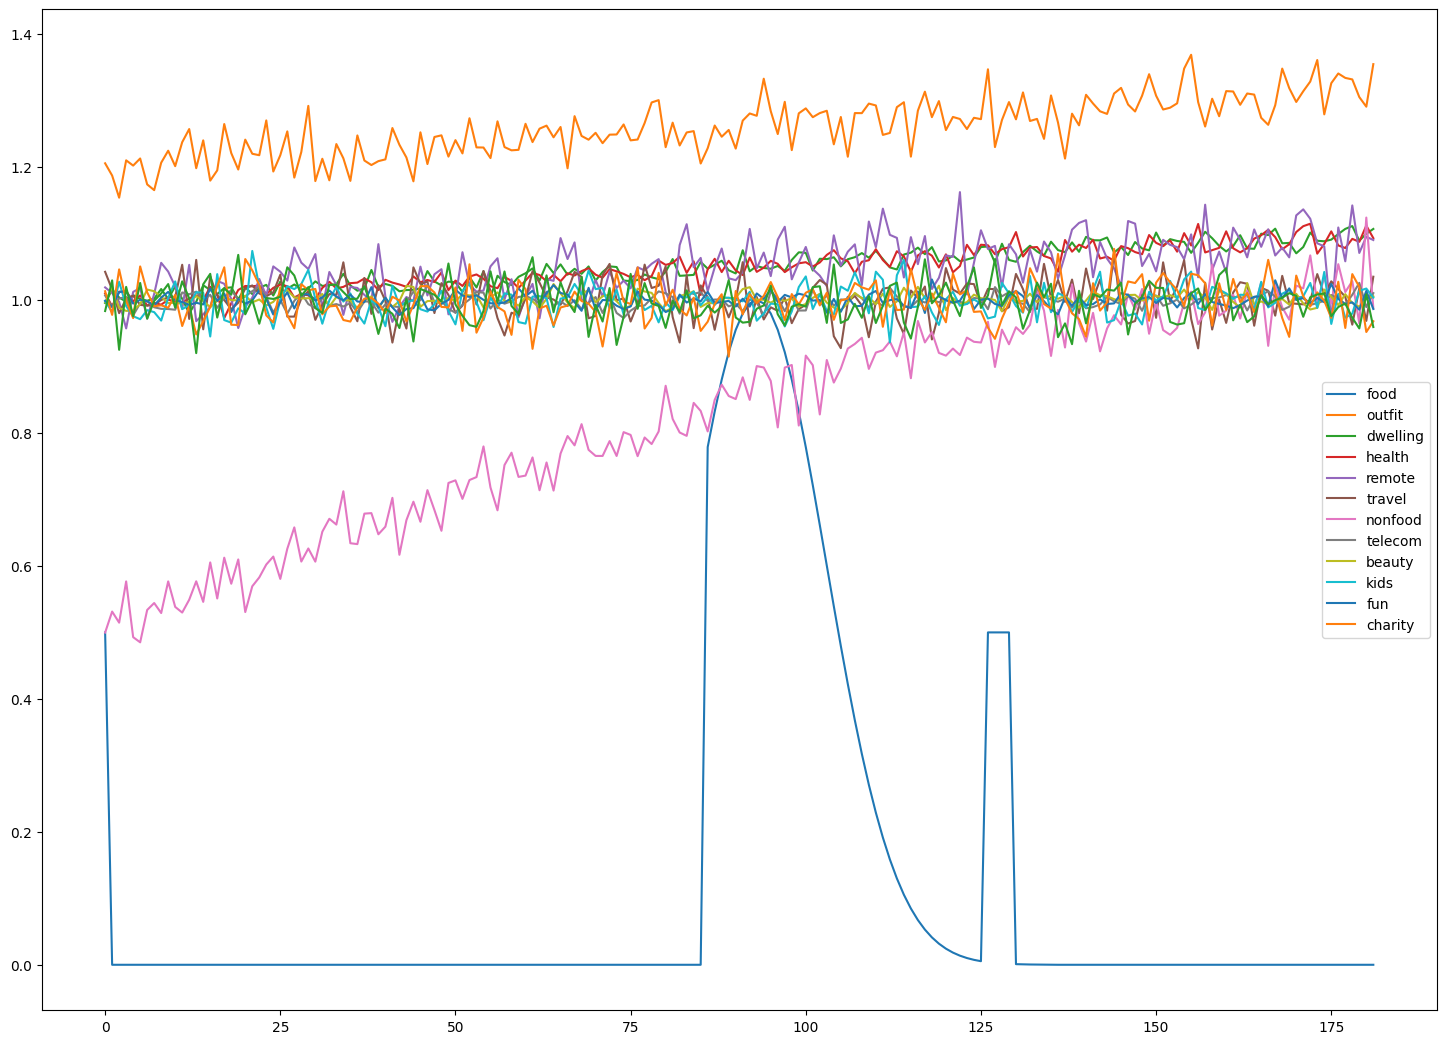

In [11]:
plt.figure(figsize=(18, 13))
plt.plot(environment[environment.columns[1:]])
plt.legend(environment.columns[2:])
plt.show()

In [12]:
Fig = """\t   ,,,,,  \n\t Wо(0,0)о \n\t |  \~/   \n\t  \__|__  \n\t   \ : / \ \n\t   (_._)  |\n\t   | _ |  M\n\t   || || \n\t @_/   \_@ \n"""
print(Fig + "Hi! I'm a simulated consumer!")

	   ,,,,,  
	 Wо(0,0)о 
	 |  \~/   
	  \__|__  
	   \ : / \ 
	   (_._)  |
	   | _ |  M
	   || || 
	 @_/   \_@ 
Hi! I'm a simulated consumer!


<>:1: SyntaxWarning: invalid escape sequence '\~'
<>:1: SyntaxWarning: invalid escape sequence '\~'
/var/folders/nr/9bjjwjk10rjdgb2mvcb226tm0000gn/T/ipykernel_78162/579912478.py:1: SyntaxWarning: invalid escape sequence '\~'
  Fig='''\t   ,,,,,  \n\t Wо(0,0)о \n\t |  \~/   \n\t  \__|__  \n\t   \ : / \ \n\t   (_._)  |\n\t   | _ |  M\n\t   || || \n\t @_/   \_@ \n'''


In [13]:
class customer:
    def __init__(self, custid, date, cust_prop):
        self.id = custid
        self.day = pd.to_datetime(date)
        self.categories = [
            "food",
            "outfit",
            "dwelling",
            "health",
            "remote",
            "travel",
            "nonfood",
            "telecom",
            "beauty",
            "kids",
            "fun",
            "charity",
        ]
        self.prop = cust_prop
        self.prop["wealth"] -= sum([cust_prop[i]["sum"] for i in self.categories])
        self.wagesday = np.random.randint(2, 13)
        self.strat = get_strat(cust_prop["strategy"])

    def time_step(self):
        global environment
        purchases = {}
        self.day += pd.Timedelta("1D")
        self.prop["satisfaction"] = 0
        needs = []  # What do we need
        cri = environment[
            environment.date == self.day.strftime("%Y-%m-%d")
        ].crisis.values[0]
        if cri > 0.01:  # Crisis
            for i in self.categories:
                dtau = (
                    self.prop[i]["tau"]
                    * np.random.normal(1, 0.01 * self.prop[i]["predictability"])
                    + self.strat[i] * cri
                )  # (crisis !!!)
                self.prop[i]["sum"] /= max(dtau, 1.01)
                self.prop["satisfaction"] += (
                    self.prop[i]["sum"] * self.prop[i]["importance"]
                )  # *(1-self.strat[i]*cri)
                salcoef = 0.7
        else:  # No crisis
            for i in self.categories:
                self.prop[i]["sum"] /= self.prop[i]["tau"] * np.random.normal(
                    1, 0.01 * self.prop[i]["predictability"]
                )
                self.prop["satisfaction"] += (
                    self.prop[i]["sum"] * self.prop[i]["importance"]
                )
                salcoef = 1.0
        if (self.day.day + self.wagesday) % 15 == 0:  # get money
            self.prop["wealth"] += self.prop["salary"] * salcoef
        for i in self.categories:
            if self.prop[i]["sum"] < self.prop[i]["limit"]:
                needs.append(i)
        if len(needs):
            if self.prop["wealth"] > 1:
                purchases = market(self, needs)  # Go shopping
                self.prop["satisfaction"] = 0
                for i in needs:
                    self.prop[i]["sum"] += purchases[i]
                    self.prop["wealth"] -= purchases[i]
                    self.prop["satisfaction"] += (
                        self.prop[i]["sum"] * self.prop[i]["importance"]
                    )
        return purchases


def market(cust, needs):
    global environment
    l = len(needs)
    fluctuation = environment[
        environment.date == cust.day.strftime("%Y-%m-%d")
    ]  # environmental influence
    cri = environment[environment.date == cust.day.strftime("%Y-%m-%d")].crisis.values[
        0
    ]
    if l > 1:
        marmod = CyLPModel()
        categ = marmod.addVariable(
            "categ", l
        )  # for optimal sums to pay in each of caterories
        a = CyLPArray([-cust.prop[i]["importance"] for i in needs])  # for objective
        B = np.zeros([l, l])  # for restraints
        np.fill_diagonal(B, 1)
        B = np.matrix(B)
        b1 = np.array(
            [cust.prop[i]["limit"] * (1 + cust.strat[i] * cri) for i in needs]
        )  # limits (crisis !!!)
        b2 = np.array([cust.prop[i]["sum"] for i in needs])  # oddments
        marmod += B * categ >= b1 - b2
        marmod += B * categ <= b1 * (1 + np.random.random_sample()) * 3
        marmod += (
            sum(categ[i] for i in range(l)) <= cust.prop["wealth"] / 2
        )  # (2-cri/2)
        marmod.objective = a * categ
        s = CyClpSimplex(marmod)
        # print('Simplex said:',s.primal())
        if s.primal() == "optimal":
            sol_x = s.primalVariableSolution["categ"]
        else:
            sol_x = np.zeros(l)
        purchases = {}
        for j, i in enumerate(needs):
            purchases[i] = sol_x[j] * fluctuation[i].values[0] * 2
    else:
        pay = min(
            cust.prop[needs[0]]["limit"] * fluctuation[needs[0]].values[0] * 2,
            cust.prop["wealth"] / 2,
        )
        purchases = {needs[0]: pay}
    return purchases


def get_strat(strategy):
    if (
        strategy == "ascetic"
    ):  #'ascetic', 'investor', 'strategist', 'alarmist', 'rationalist'
        strat = {
            "food": 1.1,
            "outfit": -0.1,
            "dwelling": 0.1,
            "health": -0.3,  # additive to tau for a customer
            "remote": 0.3,
            "travel": -0.2,
            "nonfood": -0.5,
            "telecom": -0.2,
            "beauty": 0.1,
            "kids": 0.2,
            "fun": 0.3,
            "charity": 0.1,
        }
    elif strategy == "investor":
        strat = {
            "food": 0.7,
            "outfit": 0.5,
            "dwelling": 0,
            "health": 0.7,
            "remote": 0.8,
            "travel": -0.7,
            "nonfood": 0.2,
            "telecom": 0.5,
            "beauty": 0.6,
            "kids": -0.1,
            "fun": -0.1,
            "charity": -0.1,
        }
    elif strategy == "strategist":
        strat = {
            "food": 0.4,
            "outfit": 0.1,
            "dwelling": -0.2,
            "health": 0,
            "remote": 0.4,
            "travel": -0.7,
            "nonfood": 0.1,
            "telecom": 0.5,
            "beauty": -0.1,
            "kids": 0.3,
            "fun": -0.3,
            "charity": 0.1,
        }
    elif strategy == "alarmist":
        strat = {
            "food": 0.8,
            "outfit": 0.8,
            "dwelling": -0.3,
            "health": 0.5,
            "remote": 0.3,
            "travel": -0.5,
            "nonfood": 0.1,
            "telecom": 0.5,
            "beauty": 0.1,
            "kids": 0.5,
            "fun": 0.1,
            "charity": 0.1,
        }
    else:
        strat = {
            "food": 0.7,
            "outfit": 0,
            "dwelling": 0,
            "health": 0,
            "remote": 0,
            "travel": -0.1,
            "nonfood": -0.3,
            "telecom": 0.2,
            "beauty": 0,
            "kids": 0,
            "fun": -0.2,
            "charity": 0,
        }
    return strat


def init_proprrties():
    proper0 = {
        "wealth": 100000,
        "salary": 50000,
        "food": {
            "sum": 12000,
            "tau": 1.8,
            "limit": 500,
            "importance": 9,
            "predictability": 1,
        },
        "outfit": {
            "sum": 10000,
            "tau": 1.05,
            "limit": 1000,
            "importance": 4,
            "predictability": 1,
        },
        "dwelling": {
            "sum": 10000,
            "tau": 1.02,
            "limit": 1000,
            "importance": 3,
            "predictability": 2,
        },
        "health": {
            "sum": 5000,
            "tau": 1.1,
            "limit": 1000,
            "importance": 8,
            "predictability": 2,
        },
        "remote": {
            "sum": 5000,
            "tau": 1.05,
            "limit": 700,
            "importance": 3,
            "predictability": 3,
        },
        "travel": {
            "sum": 5000,
            "tau": 1.07,
            "limit": 1000,
            "importance": 7,
            "predictability": 3,
        },
        "nonfood": {
            "sum": 3000,
            "tau": 1.05,
            "limit": 500,
            "importance": 4,
            "predictability": 9,
        },
        "telecom": {
            "sum": 500,
            "tau": 1.07,
            "limit": 300,
            "importance": 4,
            "predictability": 1,
        },
        "beauty": {
            "sum": 5000,
            "tau": 1.05,
            "limit": 500,
            "importance": 3,
            "predictability": 1,
        },
        "kids": {
            "sum": 5000,
            "tau": 1.07,
            "limit": 1000,
            "importance": 7,
            "predictability": 2,
        },
        "fun": {
            "sum": 10000,
            "tau": 1.6,
            "limit": 300,
            "importance": 8,
            "predictability": 5,
        },
        "charity": {
            "sum": 1000,
            "tau": 1.001,
            "limit": 100,
            "importance": 2,
            "predictability": 9,
        },
        "strategy": "rationalist",
        "satisfaction": 100,
    }
    return proper0


def adjust_props(prp):  # variations for different customers in population
    predvariance = [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9]
    strategies = [
        "ascetic",
        "ascetic",
        "investor",
        "strategist",
        "alarmist",
        "rationalist",
        "rationalist",
    ]  # How to react in crysis
    properties = copy.deepcopy(prp)
    scale = (1.0 + abs(np.random.standard_cauchy())) / 2  # Cauchy distribution
    properties["salary"] *= scale
    for i in [
        "food",
        "outfit",
        "dwelling",
        "health",
        "remote",
        "travel",
        "nonfood",
        "telecom",
        "beauty",
        "kids",
        "fun",
        "charity",
    ]:
        properties[i]["sum"] *= scale
        properties[i]["tau"] *= 1 + np.random.normal(0.1, 0.01)
        properties[i]["limit"] *= scale / 3
        properties[i]["importance"] += np.random.randint(
            -properties[i]["importance"] + 1, high=properties[i]["importance"]
        )
        properties[i]["predictability"] = np.random.choice(predvariance)
    properties["strategy"] = np.random.choice(strategies)
    properties["wealth"] *= scale
    return properties


"""For one customer through a year"""


def live_period(c1, prt=False):
    global environment
    if prt:
        Fig = """\t   ,,,,,  \n\t Wо(0,0)о \n\t |  \~/   \n\t  \__|__  \n\t   \ : / \ \n\t   (_._)  |\n\t   | _ |  M\n\t   || ||   \n\t @_/   \_@ \n"""
        print(Fig + "Hi! I'm a simulated consumer!")
    db = pd.DataFrame(columns=["id", "date", "category", "amt"])
    wealth = []
    satisfaction = []
    for _ in range(len(environment) - 1):
        purchases = c1.time_step()
        if purchases:
            if prt:
                print(
                    c1.day.strftime("%d.%m.%y") + ": Wealth = %.2f" % c1.prop["wealth"],
                    end=" ",
                )
            if prt:
                print(" Bought:", end="")
            for i in purchases:
                if prt:
                    print(i, "%.2f" % purchases[i], end="; ")
                if purchases[i]:
                    db = db.append(
                        pd.DataFrame(
                            {
                                "id": [c1.id],
                                "date": [c1.day.strftime("%Y-%m-%d")],
                                "category": [i],
                                "amt": [round(purchases[i], 2)],
                            }
                        ),
                        ignore_index=True,
                    )
            if prt:
                print("")
        wealth.append(c1.prop["wealth"])
        satisfaction.append(c1.prop["satisfaction"])
    return db

<>:142: SyntaxWarning: invalid escape sequence '\~'
<>:142: SyntaxWarning: invalid escape sequence '\~'
/var/folders/nr/9bjjwjk10rjdgb2mvcb226tm0000gn/T/ipykernel_78162/1019855086.py:142: SyntaxWarning: invalid escape sequence '\~'
  Fig='''\t   ,,,,,  \n\t Wо(0,0)о \n\t |  \~/   \n\t  \__|__  \n\t   \ : / \ \n\t   (_._)  |\n\t   | _ |  M\n\t   || ||   \n\t @_/   \_@ \n'''


In [14]:
"""For a single customer"""
proper0 = init_proprrties()
adjust_props(proper0)
c1 = customer("Customer", environment.date.min(), adjust_props(proper0))
db = live_period(c1, True)
print("Wealth %.2f; Salary %.2f" % (c1.prop["wealth"] / 1000, c1.prop["salary"] / 1000))
# c1.prop, c1.strat

	   ,,,,,  
	 Wо(0,0)о 
	 |  \~/   
	  \__|__  
	   \ : / \ 
	   (_._)  |
	   | _ |  M
	   || ||   
	 @_/   \_@ 
Hi! I'm a simulated consumer!
08.01.20: Wealth = 151180.12  Bought:food 2088.93; 

AttributeError: 'DataFrame' object has no attribute 'append'

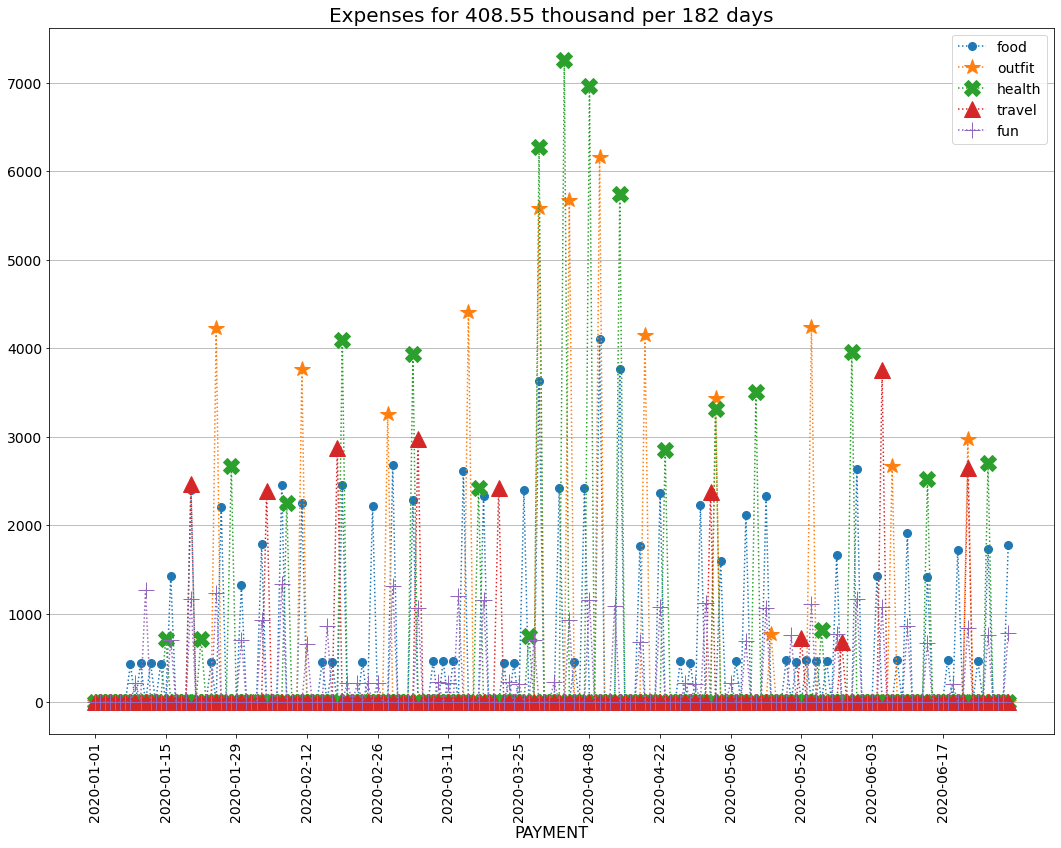

In [ ]:
s = db.amt.sum()
plt.figure(figsize=(18, 13))
gtgs = ["food", "outfit", "health", "travel", "fun"]
markers = [".", "*", "X", "^", "+", "o"]
for i, cat in enumerate(gtgs):
    catdb = pd.merge(
        pd.DataFrame(
            {
                "date": pd.date_range(
                    start=environment.date.min(), periods=len(environment)
                ).strftime("%Y-%m-%d")
            }
        ),
        db[db.category == cat][["date", "amt"]],
        on="date",
        how="outer",
    ).fillna(value=0.0)
    plt.plot(catdb.amt, marker=markers[i], markersize=16, ls=":", label=cat)
plt.title(
    "Expenses for %.2f thousand per %i days" % (s / 1000, len(environment)), size=20
)
xt = np.arange(0, len(catdb), 14)
plt.xticks(xt, catdb.date.values[xt], size=14, rotation=90)
plt.yticks(size=14)
plt.xlabel("DATE", size=16)
plt.xlabel("PAYMENT", size=16)
plt.grid(axis="y")
plt.legend(fontsize=14)
plt.show()

In [ ]:
"""Customer's properties variations in a big loop"""
proper0 = init_proprrties()
db = pd.DataFrame()
for nc in tqdm(range(1000)):
    properties = adjust_props(proper0)
    c1 = customer("Cust" + str(nc).zfill(4), environment.date.min(), properties)
    db = db.append(live_period(c1), ignore_index=True)
db

100%|██████████| 1000/1000 [13:32<00:00,  1.23it/s]


,id,date,category,amt
0,Cust0000,2020-01-08,food,206.56
1,Cust0000,2020-01-10,food,913.03
2,Cust0000,2020-01-10,fun,471.74
3,Cust0000,2020-01-12,telecom,103.35
4,Cust0000,2020-01-14,food,1193.40
...,...,...,...,...
223284,Cust0999,2020-06-25,fun,629.30
223285,Cust0999,2020-06-28,health,411.18
223286,Cust0999,2020-06-29,food,756.18
223287,Cust0999,2020-06-29,travel,1207.06


(array([ 9916.,  9042., 19620.,  9336.,  2965.,  1125.,   438.,   206.,
           68.,    27.]),
 array([ 5.28106947,  6.13893223,  6.99679499,  7.85465775,  8.71252051,
         9.57038327, 10.42824603, 11.28610879, 12.14397155, 13.00183431,
        13.85969707]),
 <a list of 10 Patch objects>)

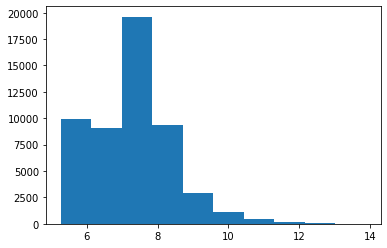

In [ ]:
a = db[db.category == "food"].amt.values
plt.hist(np.log(a))

food outfit dwelling health beauty remote travel kids nonfood telecom fun charity 
0.20824269640772503


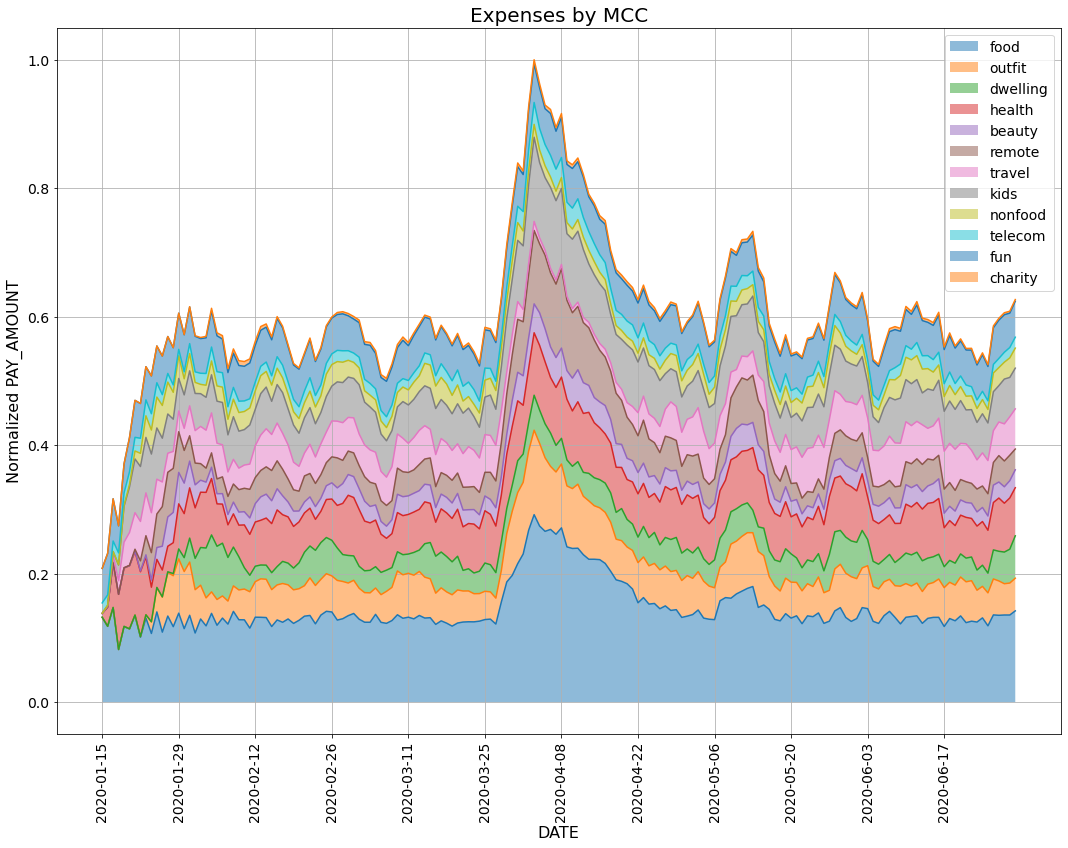

In [ ]:
"""Population exploring"""


def make_ams(data):
    ams = pd.DataFrame()
    ams["date"] = data["date"].unique()
    for v in vallab:
        print(v, end=" ")
        dm = data[data.category == v]
        amounts = dm.groupby("date")["amt"].sum()
        a = pd.DataFrame(amounts).rename(columns={"amt": v})
        ams = pd.merge(ams, a, how="outer", on="date")
    ams.fillna(value=0.0, inplace=True)
    print("")
    ams["s"] = [sum(ams.iloc[i, 1:]) for i in ams.index]
    ams = ams.drop(ams[ams.s < 1.0].index)
    ams = ams.drop("s", axis=1)
    ams.sort_values(by="date", inplace=True)
    ams = ams.reset_index()
    ams = ams.drop("index", axis=1)
    return ams


def smoothing(amn):
    amsmooth = pd.DataFrame()
    amsmooth["date"] = amn.date.values
    for i in amn.columns[1:]:
        amsmooth[i] = MovingAverage(amn[i].values, numb=len(amn) // 7)
    amsmooth = amsmooth.drop(amsmooth[:8].index)
    amsmooth = amsmooth.reset_index().drop("index", axis=1)
    return amsmooth


def draw1(ams, tit=""):
    k = np.arange(1, len(ams.columns))
    scale = max([ams.iloc[j, k].sum() for j in ams.index])
    plt.figure(figsize=(18, 13))
    plt.title("Expenses by MCC" + tit, size=20)
    ser = np.zeros(len(ams))
    for i in ams.columns[1:]:
        s1 = ser.copy()
        ser += ams[i].values / scale
        plt.plot(ser)
        plt.fill_between(np.arange(len(ser)), s1, ser, alpha=0.5, label=i)
    print(min(ser))
    xt = np.arange(0, len(ams), 14)
    plt.xticks(xt, ams.date.values[xt], size=14, rotation=90)
    plt.yticks(size=14)
    plt.xlabel("DATE", size=16)
    plt.ylabel("Normalized PAY_AMOUNT", size=16)
    plt.legend(fontsize=14)
    plt.grid(axis="both")
    plt.show()
    return None


def draw2(ams, tit=""):
    k = np.arange(1, len(ams.columns))
    plt.figure(figsize=(18, 13))
    plt.title("Expenses by MCC" + tit, size=20)
    s = {}
    for i in ams.columns[1:]:  # 6536,
        s[i] = []
        for j in ams.index:
            scale = ams.iloc[j, k].sum()
            s[i].append(ams[j : j + 1][i].values[0] / scale)
    ser = np.zeros(len(ams))
    for i in ams.columns[1:]:
        s1 = ser.copy()
        ser += s[i]  # Norm01(ams[i].values)[0]
        plt.plot(ser)
        plt.fill_between(np.arange(len(ser)), s1, ser, alpha=0.5, label=i)
    xt = np.arange(0, len(ams), 14)
    plt.xticks(xt, ams.date.values[xt], size=14, rotation=90)
    plt.yticks(size=14)
    plt.xlabel("DATE", size=16)
    plt.ylabel("RELATIVE PAY_AMOUNT", size=16)
    plt.legend(fontsize=14)
    plt.grid(axis="x")
    plt.show()
    return None


# val=[food, outfit, dwelling, health, beauty, remote, money, travel, kids, nonfood, telecom, fun, charity, misc]
vallab = [
    "food",
    "outfit",
    "dwelling",
    "health",
    "beauty",
    "remote",
    "travel",
    "kids",
    "nonfood",
    "telecom",
    "fun",
    "charity",
]  # , 'misc'
amn = make_ams(db)
amn = smoothing(amn)  # [len(amn)//2:]
draw1(amn, tit="")

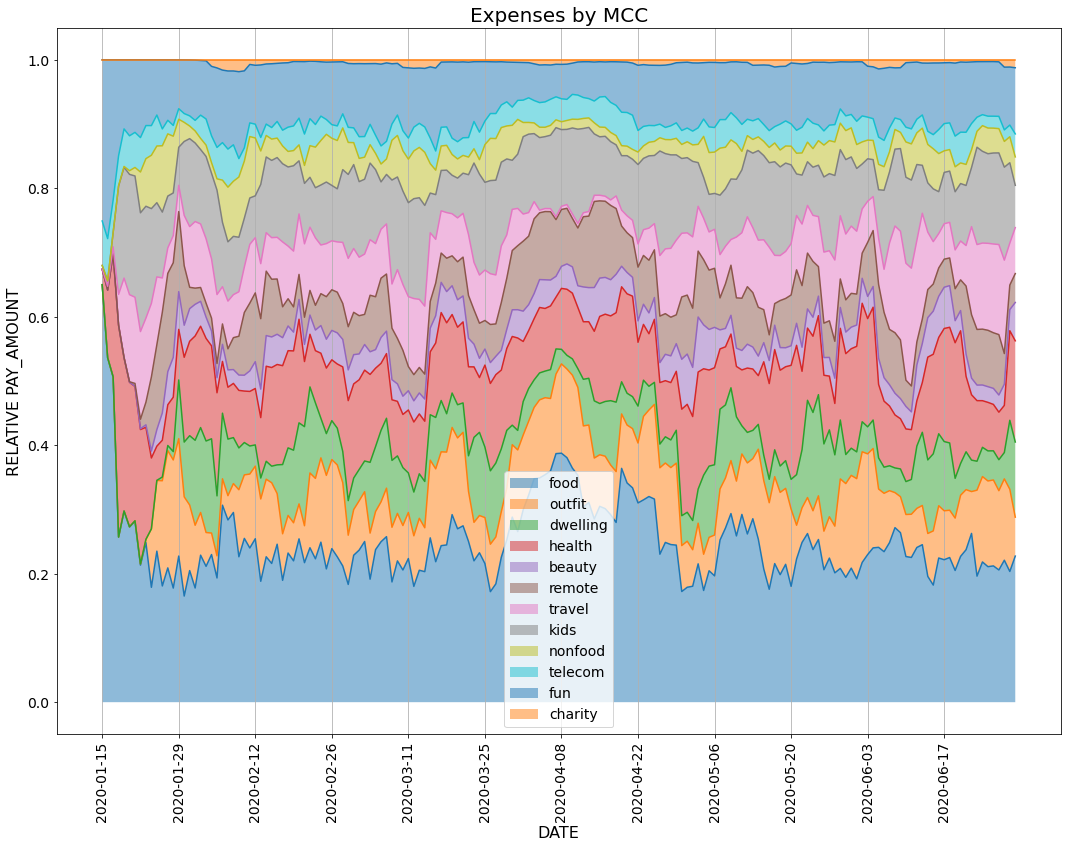

In [ ]:
draw2(amn, tit="")

In [ ]:
db.to_csv("simulated1000.csv", index=False)